In [208]:
import pandas as pd
df = pd.read_csv("/kaggle/input//train.csv")
df.sample(10)

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1422,1422,2171.0,Placebo,22347.0,F,N,Y,Y,N,3.4,260.0,3.10,161.0,754.0,94.55,158.0,264.0,11.2,4.0,D
1780,1780,2011.0,NaN,22646.0,F,NaN,NaN,NaN,N,0.6,NaN,3.40,NaN,NaN,NaN,NaN,191.0,9.9,2.0,C
11577,11577,2574.0,D-penicillamine,19327.0,F,N,Y,N,N,0.6,NaN,3.15,42.0,666.0,54.25,NaN,378.0,10.1,4.0,C
11565,11565,3492.0,NaN,21550.0,F,NaN,NaN,NaN,N,1.2,NaN,3.74,NaN,NaN,NaN,NaN,109.0,10.8,3.0,C
139,139,2272.0,D-penicillamine,17442.0,F,N,N,N,N,0.8,263.0,3.90,27.0,645.0,116.25,69.0,206.0,9.6,3.0,C
10598,10598,1653.0,NaN,17897.0,F,NaN,NaN,NaN,S,13.8,NaN,3.40,NaN,NaN,NaN,NaN,233.0,9.9,3.0,C
7236,7236,2171.0,Placebo,17263.0,F,N,N,N,N,0.5,219.0,3.43,75.0,784.0,85.25,195.0,223.0,9.9,1.0,C
14782,14782,785.0,NaN,19358.0,F,NaN,NaN,NaN,S,8.5,NaN,3.04,NaN,NaN,NaN,NaN,NaN,12.1,4.0,D
9091,9091,1320.0,Placebo,16944.0,F,N,Y,Y,N,2.1,300.0,3.80,231.0,3472.0,130.20,149.0,214.0,11.0,2.0,D
3763,3763,1443.0,NaN,14975.0,M,NaN,NaN,NaN,N,2.9,NaN,3.40,NaN,NaN,NaN,NaN,120.0,11.0,4.0,C


In [209]:
df.shape

(15000, 20)

In [210]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,15000.000000,15000.00000,15000.000000,15000.000000,6625.000000,15000.000000,8343.000000,8453.000000,8449.000000,6578.000000,14418.000000,14981.000000,15000.000000
mean,7499.500000,1957.65580,19340.767667,1.869133,327.408755,3.523682,74.437732,1671.871596,106.072495,110.992703,253.589402,10.624471,3.037200
std,4330.271354,1346.32124,3731.980408,2.716933,172.503702,0.368956,72.604081,1874.328641,55.331238,50.127109,92.802002,0.728577,0.877497
min,0.000000,28.00000,1223.000000,0.300000,44.000000,1.960000,2.000000,140.000000,26.350000,4.000000,2.000000,9.000000,1.000000
25%,3749.750000,1095.00000,16714.000000,0.700000,242.000000,3.290000,31.000000,724.000000,71.000000,80.000000,183.000000,10.100000,2.000000
50%,7499.500000,1770.00000,19698.000000,0.900000,280.000000,3.580000,52.000000,1080.000000,97.650000,99.000000,249.000000,10.600000,3.000000
75%,11249.250000,2609.00000,22388.000000,1.800000,364.000000,3.770000,88.000000,1692.000000,130.200000,133.000000,311.000000,11.000000,4.000000
max,14999.000000,25569.00000,127321.000000,28.000000,2580.000000,4.640000,674.000000,20392.000000,2656.700000,598.000000,824.000000,18.000000,4.000000


In [211]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [212]:
df.isnull().sum().sort_values(ascending = False)

Tryglicerides    8422
Cholesterol      8375
Copper           6657
Spiders          6552
SGOT             6551
Alk_Phos         6547
Hepatomegaly     6543
Drug             6541
Ascites          6540
Platelets         582
Prothrombin        19
Stage               0
id                  0
Albumin             0
N_Days              0
Bilirubin           0
Edema               0
Sex                 0
Age                 0
Status              0
dtype: int64

In [213]:
df.nunique()

id               15000
N_Days             578
Drug                 3
Age                383
Sex                  2
Ascites              2
Hepatomegaly         2
Spiders              3
Edema                3
Bilirubin          119
Cholesterol        214
Albumin            166
Copper             173
Alk_Phos           378
SGOT               193
Tryglicerides      154
Platelets          260
Prothrombin         48
Stage                4
Status               3
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df.drop(['', ''], axis = 1)
y = df['']
le = LabelEncoder()
y = le.fit_transform(y)

In [215]:
num_cols = X.select_dtypes(exclude = ['object']).columns.tolist()
cat_cols = X.select_dtypes(include = ['object']).columns.tolist()
print("Numerical Variables are: ", num_cols)
print("Categorical Variables are: ", cat_cols)

Numerical Variables are:  ['N_Days', 'Age', 'Bilirubin', 'Albumin', 'Platelets', 'Prothrombin', 'Stage']
Categorical Variables are:  ['Sex', 'Edema']


In [ ]:
for col in num_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    train_df[col] = np.where(train_df[col] < lower, lower, train_df[col])
    train_df[col] = np.where(train_df[col] > upper, upper, train_df[col])

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

<Axes: xlabel='Status', ylabel='count'>

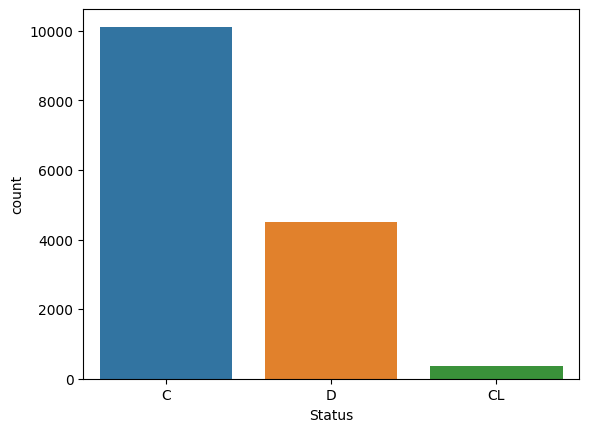

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = '', data = df)

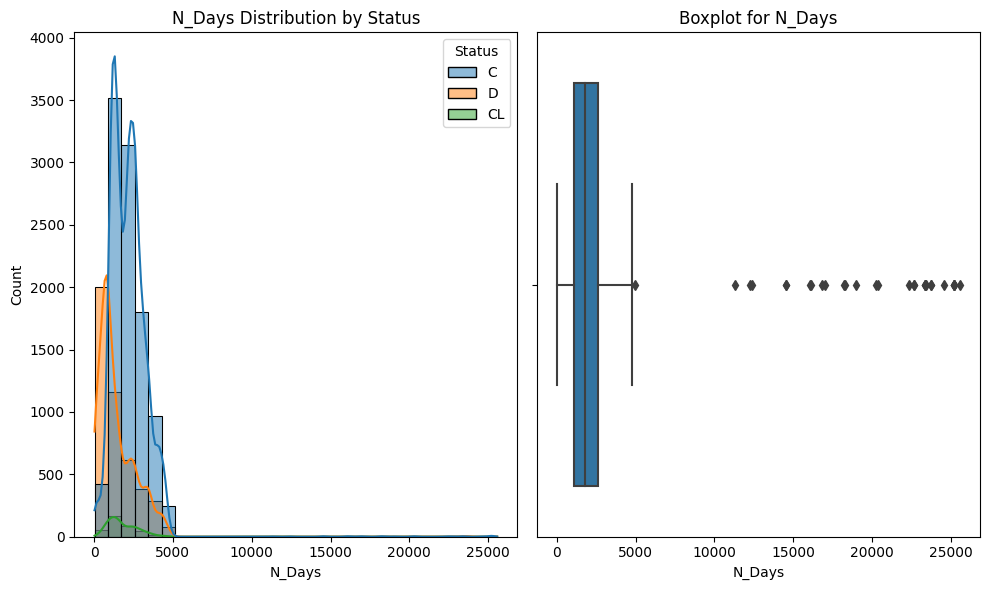

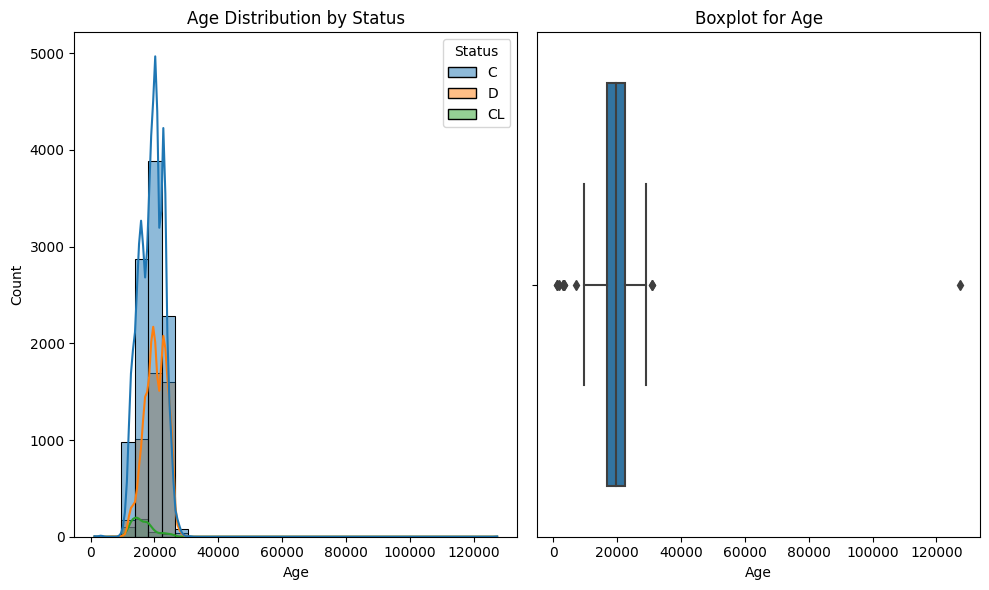

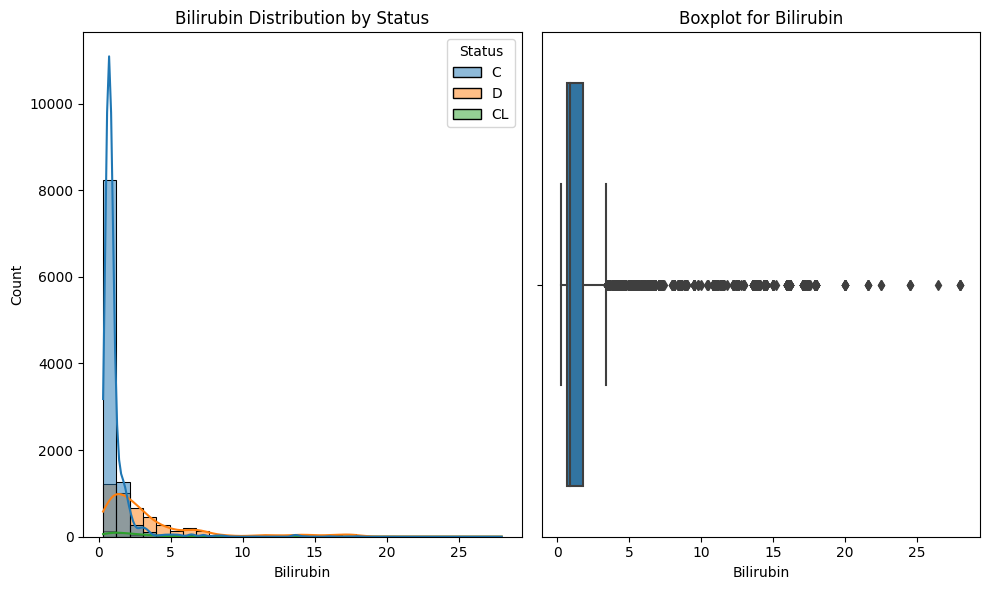

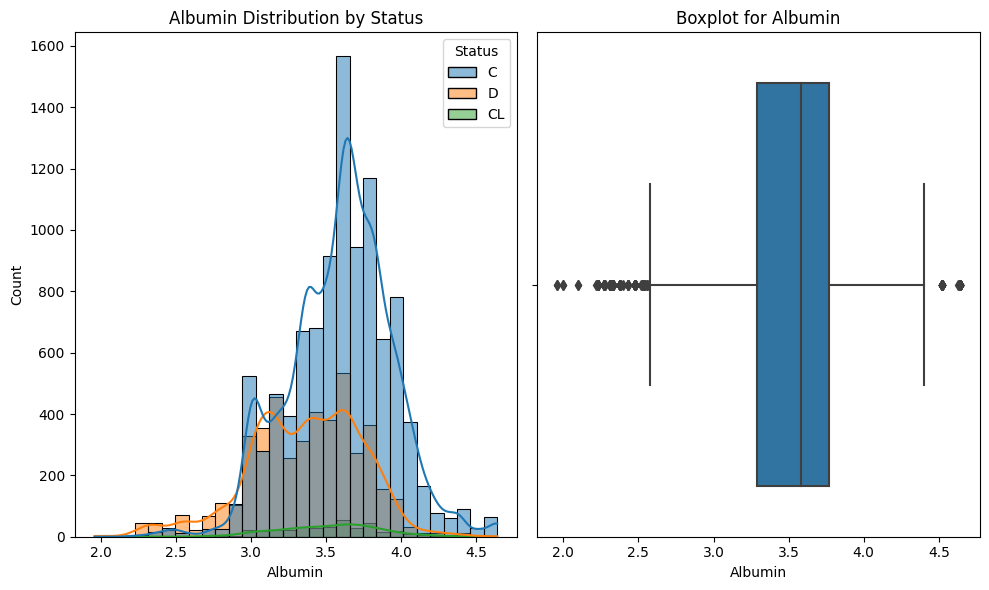

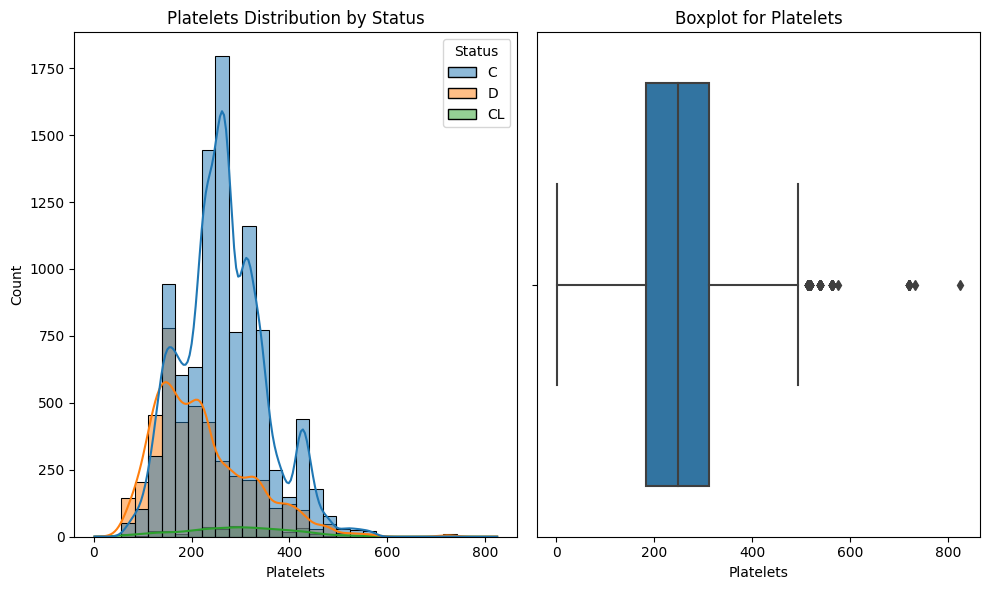

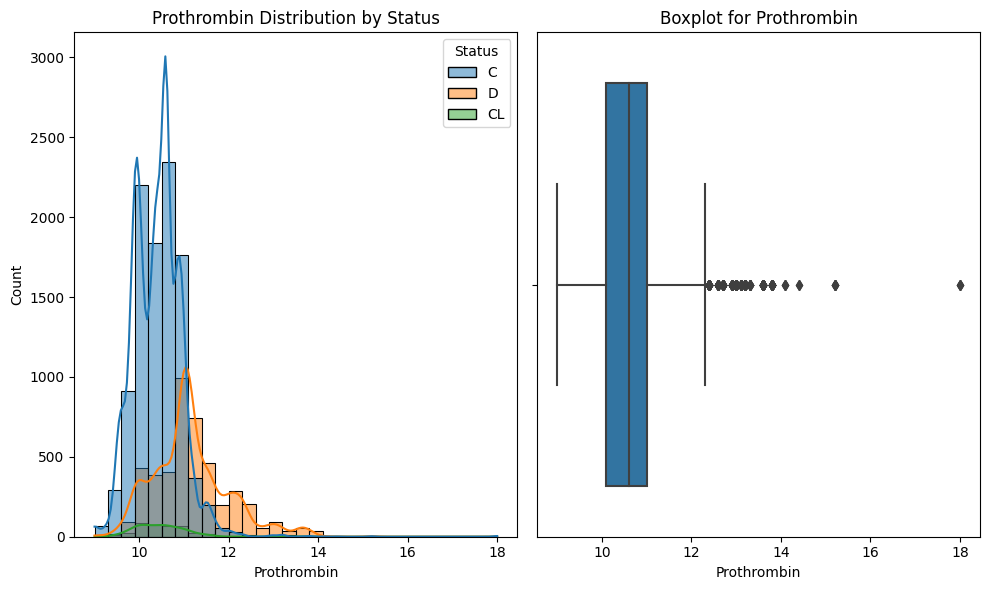

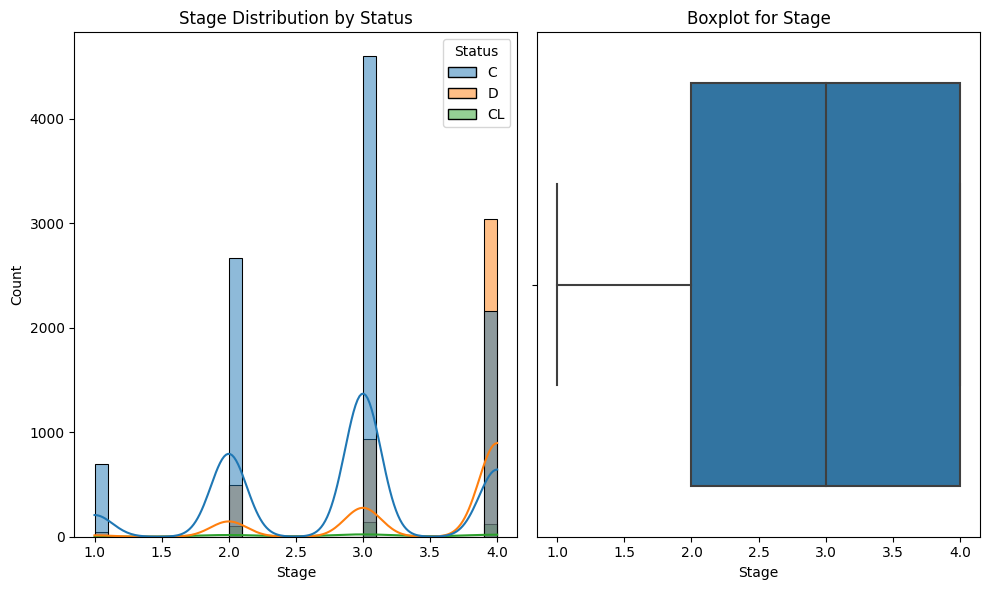

In [217]:
for col in num_cols:
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(x = col, data = df, kde = True, bins = 30, hue = '')
    plt.title(f'{col} Distribution by ')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = col, data = df)
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

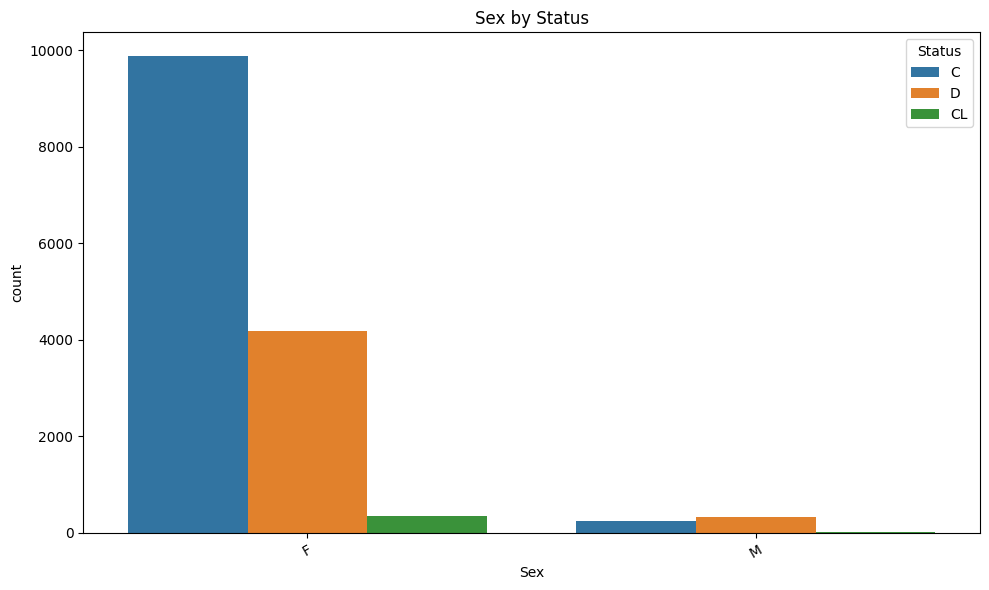

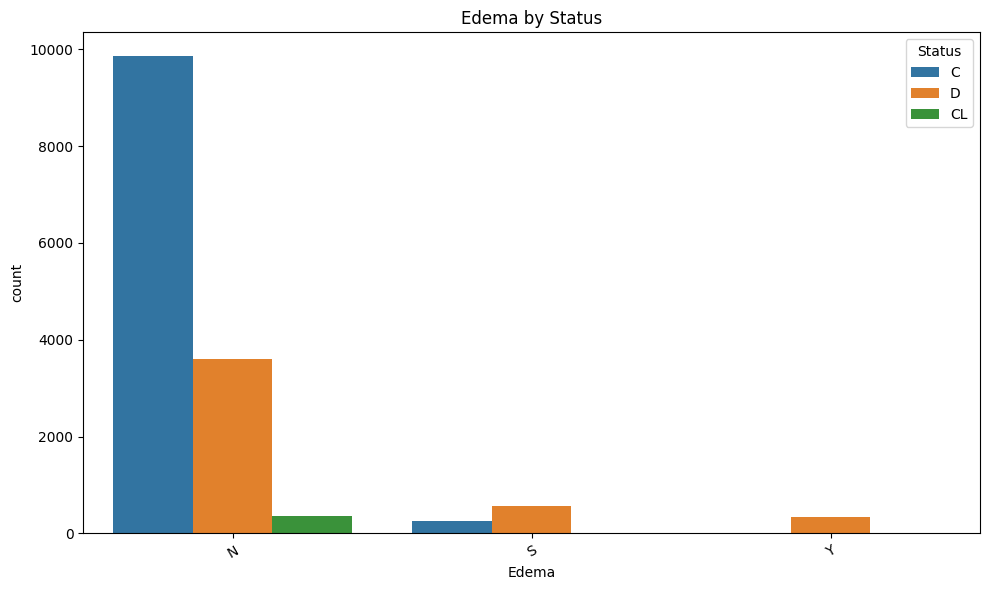

In [218]:
for col in cat_cols:
    plt.figure(figsize = (10, 6))
    sns.countplot(data = df, x = col, hue = 'Status')
    plt.title(f'{col} by Status')
    plt.xticks(rotation = 30)
    plt.tight_layout()
    plt.show()

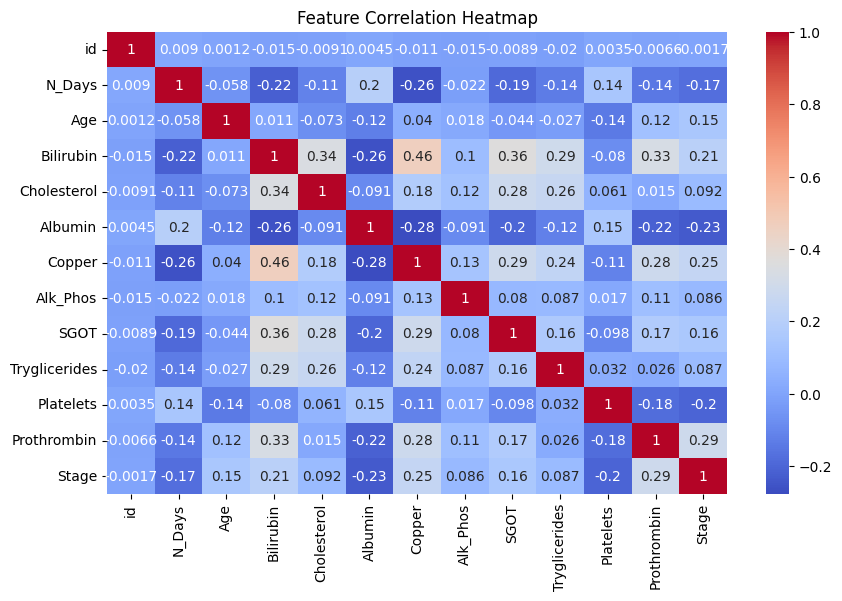

In [219]:
numeric_data = df.select_dtypes(include = ['number'])
plt.figure(figsize = (10,6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = 'coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [220]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
])

In [221]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder = 'drop')

# preprocessing = Pipeline([('preprocessor', preprocessor)])
# X_train = preprocessing.fit_transform(X_train)
# X_test = preprocessing.transform(X_test)

In [222]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# param_grid = {
#     # 'max_depth': [10, 25, 50],
#     # 'min_samples_split': [2, 5, 10],
#     # 'min_samples_leaf': [1, 2, 4, 8],
#     'max_features': ['log2', 'sqrt'],
#     # 'class_weight': ['balanced', 'balanced_subsample']
# }
# rf = RandomForestClassifier(n_estimators = 250, class_weight = 'balanced', random_state = 42)

# grid_search = RandomizedSearchCV(
#     estimator = rf,
#     # param_grid = param_grid,
#     param_distributions = param_grid,
#     n_iter = 5,
#     cv = 3,
#     n_jobs = -1,
#     scoring = 'roc_auc_ovr',
#     random_state = 42
# )
# grid_search.fit(X_train, y_train)

# print("Best score:", grid_search.best_score_)
# rf = grid_search.best_estimator_

In [223]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(
    n_estimators = 600,
    learning_rate = 0.02,
    max_depth = 4,
    min_samples_split = 42,
    min_samples_leaf = 18,
    max_features = 0.7,
    subsample = 0.7,
    random_state = 42
)

In [224]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators = 1000,
    max_depth = 15,
    min_samples_split = 11,
    min_samples_leaf = 6,
    max_features = 'sqrt',
    # bootstrap = True,
    # max_samples = 0.7, 
    class_weight = 'balanced',
    random_state = 42
)

In [225]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf)
    # ('calssifier', gbc)
])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'Albumin', 'Platelets',
                                                   'Prothrombin', 'Stage']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Edema'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=15,
                                        min_samples_leaf=6,
                                        min_samples_split=11, n_estimators=1000,
                                        random_state=42))])

In [226]:
from sklearn.metrics import roc_auc_score
pred_proba = model.predict_proba(X_train)
print("ROC AUC:", roc_auc_score(y_train, pred_proba, multi_class = 'ovr', average = 'macro'))

ROC AUC: 0.9720293327796267


In [227]:
from sklearn.metrics import log_loss
print("Log Loss:", log_loss(y_train, pred_proba))

Log Loss: 0.36639259426219617


In [228]:
pred_proba = model.predict_proba(X_test)
print("ROC AUC:", roc_auc_score(y_test, pred_proba, multi_class = 'ovr', average = 'macro'))

ROC AUC: 0.8929553788615981


In [229]:
print("Log Loss:", log_loss(y_test, pred_proba))

Log Loss: 0.4761258139247822


In [230]:
# test_df = pd.read_csv("/kaggle/input//test.csv")
# X = test_df.drop(['id'], axis = 1)
# # X = preprocessing.transform(X)
# pred_proba = model.predict_proba(X)

# submission_df = pd.DataFrame(pred_proba, columns = model.classes_)
# submission_df.insert(0, 'id', test_df['id'])
# submission_df.to_csv('submission.csv', index = False)

In [ ]:
# test_df = pd.read_csv("/kaggle/input//test.csv")
# X = test_df.drop(['id'], axis = 1)
# pred_proba = model.predict_proba(X)

# original_classes = le.inverse_transform(model.classes_)

# submission = pd.DataFrame(pred_proba, columns = original_classes)
# submission.insert(0, 'id', test_df['id'])
# submission.to_csv("submission.csv", index = False)

In [ ]:
# test_df = pd.read_csv('/kaggle/input//test_data.csv')
# X_test = test_df.drop('id', axis = 1)
# y_pred = model.predict(X_test)

# submission_df = pd.DataFrame({'id': test_df['id'], 'Status': y_pred})
# submission_df.to_csv('submission.csv', index = False)

In [ ]:
# test_df = pd.read_csv('/kaggle/input//test_data.csv')
# X_test = test_df.drop('id', axis=1)
# y_pred = model.predict(X_test)
# y_pred = le.inverse_transform(y_pred)

# submission_df = pd.DataFrame({'id': test_df['id'], 'Status': y_pred})
# submission_df.to_csv('submission.csv', index = False)